In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm

#With norm.cdf, we can get the CDF value given a standard normal
print(norm.cdf(0))
print(norm.cdf(1.645))

0.5
0.9500150944608786


In [2]:
def black_scholes_call(S, X, sigma, rf, t):
    d1 = 1/(sigma*t**.5) * (np.log(S/X)  + (rf + sigma **2 /2) * t)
    d2 = d1 - sigma * t**.5
    return norm.cdf(d1) * S - norm.cdf(d2) * X * np.exp(-rf*t)
print(black_scholes_call(50, 55, .08, .03, 1))

0.48238113952467465


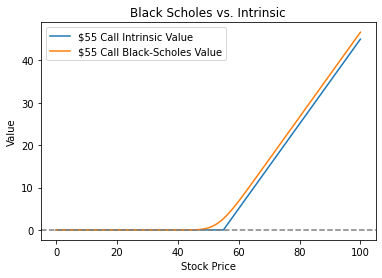

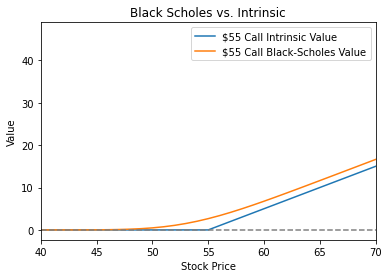

In [3]:
import matplotlib.pyplot as plt
#Compute values for the intrinsic value and the black-scholes value
df = pd.DataFrame(list(range(101)), columns = ['Stock Price'])
df['$55 Call Intrinsic Value'] = df['Stock Price'].apply(lambda x: max(x-55, 0))
df['$55 Call Black-Scholes Value'] = df['Stock Price'].apply(lambda x: black_scholes_call(x, 55, .08, .03, 1))
df = df.set_index('Stock Price')

#Plot the value of the option
ax = df.plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.title("Black Scholes vs. Intrinsic")
plt.show()

ax = df.plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlim([40,70])
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.title("Black Scholes vs. Intrinsic")
plt.show()

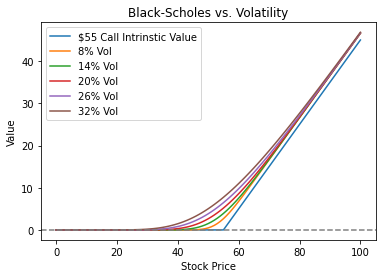

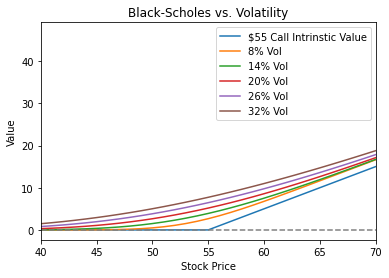

In [4]:
#Test the values with different volatilities
df = pd.DataFrame(list(range(101)), columns = ['Stock Price'])
df['$55 Call Intrinstic Value'] = df['Stock Price'].apply(lambda x: max(x-55, 0))

for vol in [.08, .14, .20, .26, .32]:
    df[str(int(vol*100))+"% Vol"] = df['Stock Price'].apply(lambda x: black_scholes_call(x, 55, vol, .03, 1))
df = df.set_index('Stock Price')

ax = df.plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.title("Black-Scholes vs. Volatility")
plt.show()

ax = df.plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlim([40,70])
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.title("Black-Scholes vs. Volatility")
plt.show()

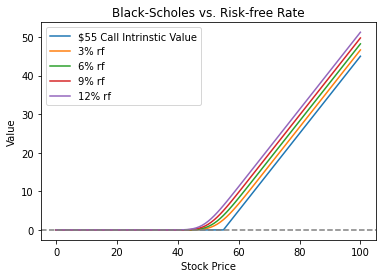

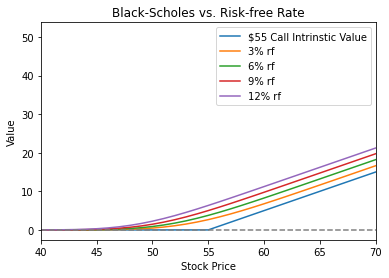

In [5]:
#Test the values with different risk-free rates
df = pd.DataFrame(list(range(101)), columns = ['Stock Price'])
df['$55 Call Intrinstic Value'] = df['Stock Price'].apply(lambda x: max(x-55, 0))

for rf in [.03, .06, .09, .12]:
    df[str(int(rf*100))+"% rf"] = df['Stock Price'].apply(lambda x: black_scholes_call(x, 55, .08, rf, 1))
df = df.set_index('Stock Price')

ax = df.plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.title("Black-Scholes vs. Risk-free Rate")
plt.show()

ax = df.plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlim([40,70])
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.title("Black-Scholes vs. Risk-free Rate")
plt.show()

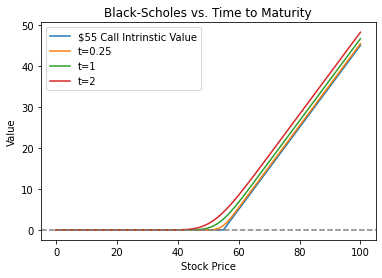

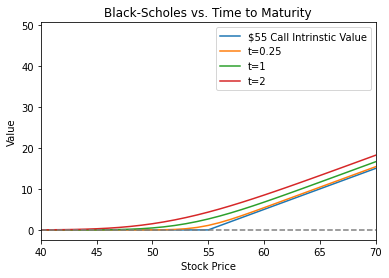

In [6]:
#Test the values with different time to maturities
df = pd.DataFrame(list(range(101)), columns = ['Stock Price'])
df['$55 Call Intrinstic Value'] = df['Stock Price'].apply(lambda x: max(x-55, 0))

for t in [.25, 1, 2]:
    df["t="+str(t)] = df['Stock Price'].apply(lambda x: black_scholes_call(x, 55, .08, .03, t))
df = df.set_index('Stock Price')

ax = df.plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.title("Black-Scholes vs. Time to Maturity")
plt.show()

ax = df.plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlim([40,70])
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.title("Black-Scholes vs. Time to Maturity")
plt.show()

In [7]:
#Delta is the change in the option value for a change in the underlying stock
def black_scholes_delta(S, X, sigma, rf, t):
    d1 = 1/(sigma*t**.5) * (np.log(S/X)  + (rf + sigma **2 /2) * t)
    return norm.cdf(d1)

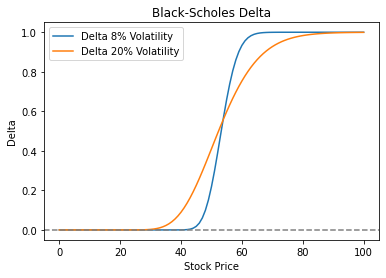

In [8]:
df = pd.DataFrame(list(range(101)), columns = ['Stock Price'])
df['Delta 8% Volatility'] = df['Stock Price'].apply(lambda x: black_scholes_delta(x, 55, .08, .03, 1))
df['Delta 20% Volatility'] = df['Stock Price'].apply(lambda x: black_scholes_delta(x, 55, .20, .03, 1))
df = df.set_index('Stock Price')
ax = df.plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel("Stock Price")
plt.ylabel("Delta")
plt.title("Black-Scholes Delta")
plt.show()

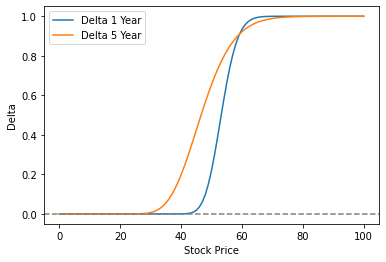

In [9]:
df = pd.DataFrame(list(range(101)), columns = ['Stock Price'])
df['Delta 1 Year'] = df['Stock Price'].apply(lambda x: black_scholes_delta(x, 55, .08, .03, 1))
df['Delta 5 Year'] = df['Stock Price'].apply(lambda x: black_scholes_delta(x, 55, .08, .03, 5))
df = df.set_index('Stock Price')
ax = df.plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel("Stock Price")
plt.ylabel("Delta")
plt.show()

In [10]:
def black_scholes_gamma(S, X, sigma, rf, t):
    d1 = 1/(sigma*t**.5) * (np.log(S/X)  + (rf + sigma **2 /2) * t)
    dN = np.exp(-d1**2/2) / (2 * np.pi)
    return dN / (S * sigma * t **.5)

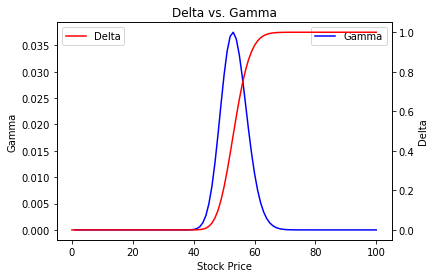

In [11]:
df = pd.DataFrame(list(range(101)), columns = ['Stock Price'])
df['Delta'] = df['Stock Price'].apply(lambda x: black_scholes_delta(x, 55, .08, .03, 1))
df['Gamma'] = df['Stock Price'].apply(lambda x: black_scholes_gamma(x, 55, .08, .03, 1))
df = df.set_index('Stock Price')


fig, ax1 = plt.subplots()
#Build a second axis for the delta plotting
ax2 = ax1.twinx()

ax1.plot(df.index, df['Gamma'], 'blue')
ax2.plot(df.index, df['Delta'], 'red')

ax1.set_xlabel('Stock Price')
ax1.set_ylabel('Gamma')
ax2.set_ylabel('Delta')
ax1.legend(['Gamma'])
ax2.legend(['Delta'])

plt.title("Delta vs. Gamma")

plt.show()

In [12]:
print(black_scholes_call(50, 55, .08, .03, 1) * 1000)

482.38113952467467


In [13]:
print(black_scholes_delta(50, 55, .08, .03, 1) * 1000)

218.76313733260366


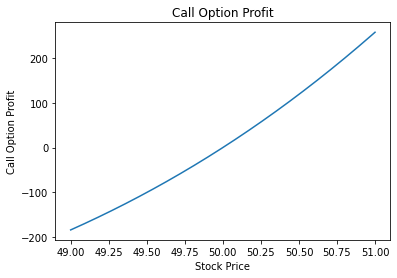

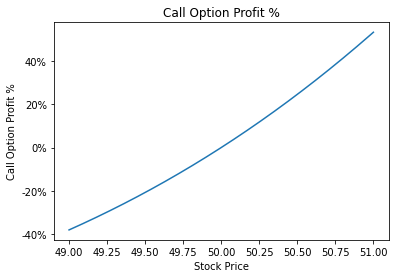

In [14]:
from matplotlib.ticker import PercentFormatter 

df = pd.DataFrame(np.arange(49,51.01,.01), columns = ['Stock Price'])
df['Call Value'] = df['Stock Price'].apply(lambda x: black_scholes_call(x, 55, .08, .03, 1) * 1000 ) - black_scholes_call(50, 55, .08, .03, 1) * 1000
df = df.set_index('Stock Price')
df['Call Value'].plot(kind='line')
plt.ylabel("Call Option Profit")
plt.xlabel("Stock Price")
plt.title("Call Option Profit")
plt.show()

df['Call % Return'] = df['Call Value'] / (black_scholes_call(50, 55, .08, .03, 1) * 1000)
ax = df['Call % Return'].plot(kind='line')
plt.ylabel("Call Option Profit %")
plt.xlabel("Stock Price")
plt.title("Call Option Profit %")
#Set a percent formatter
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))  
plt.show()

In [15]:
n_calls = 1000

delta = black_scholes_delta(50, 55, .08, .03, 1)
print("Call Delta")
print(delta)
print()

long_calls_t0 = black_scholes_call(50, 55, .08, .03, 1)*n_calls
print("Value of Calls")
print(long_calls_t0)
print()

n_stock = delta * n_calls * -1
print("Number of shares of stock to hedge")
print(n_stock)
print()

short_stock_t0 = n_stock * 55
print("Value of shares of stock")
print(short_stock_t0)

Call Delta
0.21876313733260366

Value of Calls
482.38113952467467

Number of shares of stock to hedge
-218.76313733260366

Value of shares of stock
-12031.9725532932


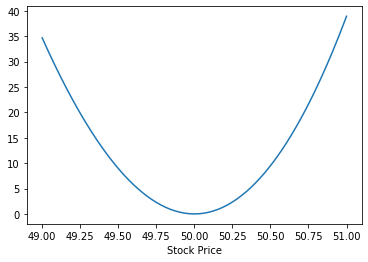

In [16]:
#If there is an immediate change in price either way we are protected
df = pd.DataFrame(np.arange(49,51.01,.01), columns = ['Stock Price'])

#The call profit is the difference between the starting value and current value
df['Call Value'] = df['Stock Price'].apply(lambda x: black_scholes_call(x, 55, .08, .03, 1) * n_calls ) - long_calls_t0

#The stock profit is the difference times the number of stocks (we are short so the profits are flipped)
df['Stock Value'] = (df['Stock Price'] - 50) * n_stock

#The hedged call value is the two profits added together
df['Hedged Call'] = df['Call Value'] + df['Stock Value']

#Plot the profits
df = df.set_index('Stock Price')
df['Hedged Call'].plot(kind='line')
plt.show()

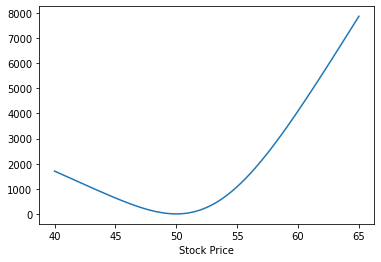

In [17]:
#Repeat for a wider range
df = pd.DataFrame(np.arange(40,65.1,.1), columns = ['Stock Price'])

df['Call Value'] = df['Stock Price'].apply(lambda x: black_scholes_call(x, 55, .08, .03, 1) * n_calls ) - long_calls_t0
df['Stock Value'] = (df['Stock Price'] - 50) * n_stock
df['Hedged Call'] = df['Call Value'] + df['Stock Value']

df = df.set_index('Stock Price')
df['Hedged Call'].plot(kind='line')
plt.show()

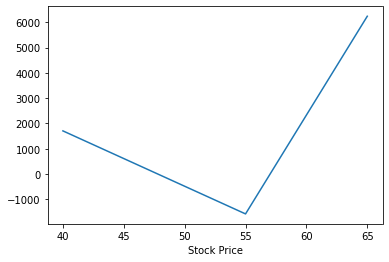

In [18]:
#At expiration the payoff profile is different though...
df = pd.DataFrame(np.arange(40,65.1,.1), columns = ['Stock Price'])

#The call profit is the intrinsic value at expiration
df['Call Value'] = df['Stock Price'].apply(lambda x: max(x-55, 0) * n_calls ) - long_calls_t0

#The stock profit is the difference times the number of stocks (we are short so the profits are flipped)
df['Stock Value'] = (df['Stock Price'] - 50) * n_stock

#The hedged call value is the two profits added together
df['Hedged Call'] = df['Call Value'] + df['Stock Value']

#Plot the profits
df = df.set_index('Stock Price')
df['Hedged Call'].plot(kind='line')
plt.show()

In [19]:
#We should also consider the interest that we would get. Because we are short we have an inflow of cash from it
#Take the negative of the total value
net_cash = -(long_calls_t0 + short_stock_t0)
print("Net cash:")
print(net_cash)
print()

#And we would get the 3% interest over the year so
interest = np.exp(.03) * net_cash - net_cash
print("Interest:")
print(interest)

Net cash:
11549.591413768527

Interest:
351.7374238598604


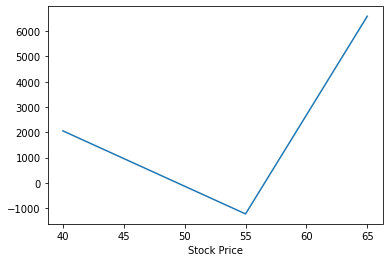

In [20]:
#So we can add that in to the final graph

#At expiration the payoff profile is different though...
df = pd.DataFrame(np.arange(40,65.1,.1), columns = ['Stock Price'])

#The call profit is the intrinsic value at expiration
df['Call Value'] = df['Stock Price'].apply(lambda x: max(x-55, 0) * n_calls ) - long_calls_t0

#The stock profit is the difference times the number of stocks (we are short so the profits are flipped)
df['Stock Value'] = (df['Stock Price'] - 50) * n_stock

#The hedged call value is the two profits added together
df['Hedged Call'] = df['Call Value'] + df['Stock Value'] + interest

#Plot the profits
df = df.set_index('Stock Price')
df['Hedged Call'].plot(kind='line')
plt.show()

In [21]:
#The black-scholes formula for put options
def black_scholes_put(S, X, sigma, rf, t):
    d1 = 1/(sigma*t**.5) * (np.log(S/X)  + (rf + sigma **2 /2) * t)
    d2 = d1 - sigma * t**.5
    return  norm.cdf(-d2) * X * np.exp(-rf*t) - norm.cdf(-d1) * S
print(black_scholes_put(50, 55, .08, .03, 1))

3.8568854846926257


In [22]:
#We can verify put-call parity

#Call and present value of X
print(black_scholes_call(50, 55, .08, .03, 1) + 55 * np.exp(-.03*1))

#Put and current price of stock
print(black_scholes_put(50, 55, .08, .03, 1) + 50)

53.856885484692626
53.856885484692626


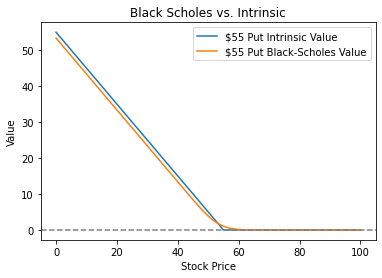

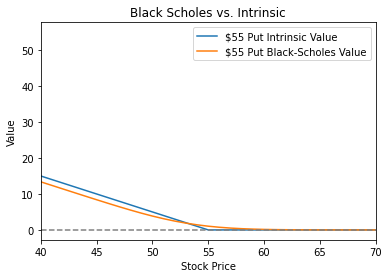

In [23]:
#Compute values for the intrinsic value and the black-scholes value
df = pd.DataFrame(list(range(101)), columns = ['Stock Price'])
df['$55 Put Intrinsic Value'] = df['Stock Price'].apply(lambda x: max(55-x, 0))
df['$55 Put Black-Scholes Value'] = df['Stock Price'].apply(lambda x: black_scholes_put(x, 55, .08, .03, 1))
df = df.set_index('Stock Price')

#Plot the value of the option
ax = df.plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.title("Black Scholes vs. Intrinsic")
plt.show()

ax = df.plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlim([40,70])
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.title("Black Scholes vs. Intrinsic")
plt.show()

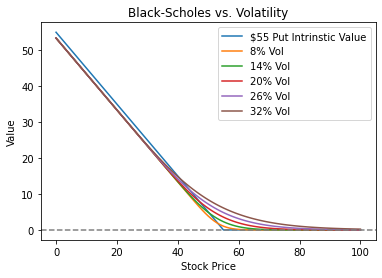

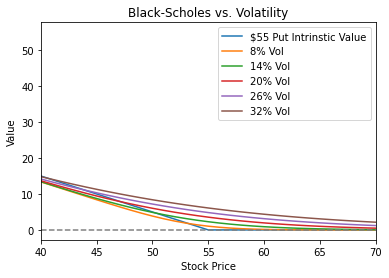

In [24]:
#Test the values with different volatilities
df = pd.DataFrame(list(range(101)), columns = ['Stock Price'])
df['$55 Put Intrinstic Value'] = df['Stock Price'].apply(lambda x: max(55-x, 0))

for vol in [.08, .14, .20, .26, .32]:
    df[str(int(vol*100))+"% Vol"] = df['Stock Price'].apply(lambda x: black_scholes_put(x, 55, vol, .03, 1))
df = df.set_index('Stock Price')

ax = df.plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.title("Black-Scholes vs. Volatility")
plt.show()

ax = df.plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlim([40,70])
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.title("Black-Scholes vs. Volatility")
plt.show()

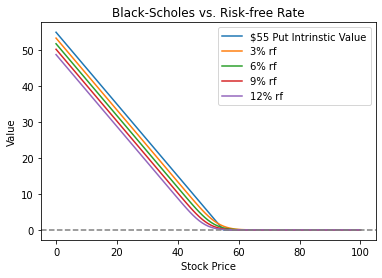

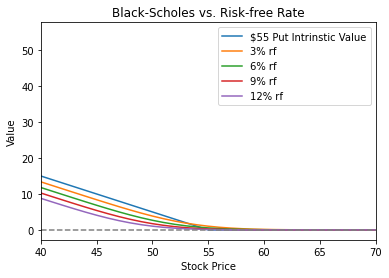

In [25]:
#Test the values with different risk-free rates
df = pd.DataFrame(list(range(101)), columns = ['Stock Price'])
df['$55 Put Intrinstic Value'] = df['Stock Price'].apply(lambda x: max(55-x, 0))

for rf in [.03, .06, .09, .12]:
    df[str(int(rf*100))+"% rf"] = df['Stock Price'].apply(lambda x: black_scholes_put(x, 55, .08, rf, 1))
df = df.set_index('Stock Price')

ax = df.plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.title("Black-Scholes vs. Risk-free Rate")
plt.show()

ax = df.plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlim([40,70])
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.title("Black-Scholes vs. Risk-free Rate")
plt.show()

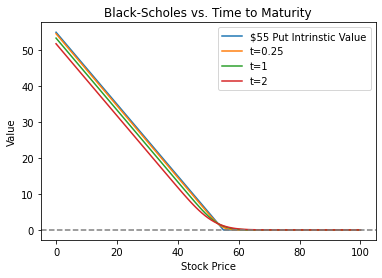

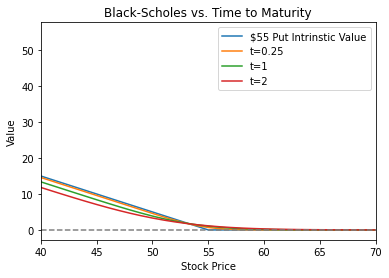

In [26]:
#Test the values with different time to maturities
df = pd.DataFrame(list(range(101)), columns = ['Stock Price'])
df['$55 Put Intrinstic Value'] = df['Stock Price'].apply(lambda x: max(55-x, 0))

for t in [.25, 1, 2]:
    df["t="+str(t)] = df['Stock Price'].apply(lambda x: black_scholes_put(x, 55, .08, .03, t))
df = df.set_index('Stock Price')

ax = df.plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.title("Black-Scholes vs. Time to Maturity")
plt.show()

ax = df.plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlim([40,70])
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.title("Black-Scholes vs. Time to Maturity")
plt.show()

In [27]:
#Create the put delta equation
def black_scholes_put_delta(S, X, sigma, rf, t):
    d1 = 1/(sigma*t**.5) * (np.log(S/X)  + (rf + sigma **2 /2) * t)
    return -norm.cdf(-d1)

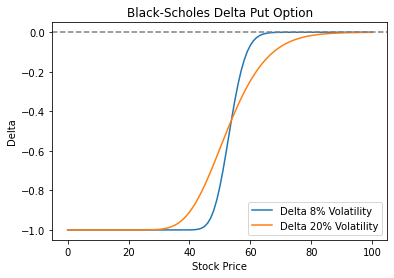

In [28]:
#Compute the delta for different volatilities
df = pd.DataFrame(list(range(101)), columns = ['Stock Price'])
df['Delta 8% Volatility'] = df['Stock Price'].apply(lambda x: black_scholes_put_delta(x, 55, .08, .03, 1))
df['Delta 20% Volatility'] = df['Stock Price'].apply(lambda x: black_scholes_put_delta(x, 55, .20, .03, 1))
df = df.set_index('Stock Price')
ax = df.plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel("Stock Price")
plt.ylabel("Delta")
plt.title("Black-Scholes Delta Put Option")
plt.show()

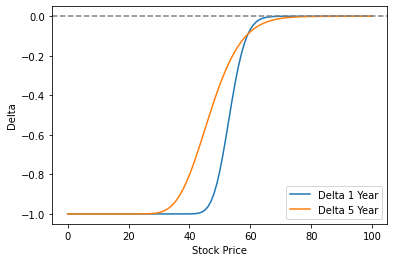

In [29]:
#And check time to maturity
df = pd.DataFrame(list(range(101)), columns = ['Stock Price'])
df['Delta 1 Year'] = df['Stock Price'].apply(lambda x: black_scholes_put_delta(x, 55, .08, .03, 1))
df['Delta 5 Year'] = df['Stock Price'].apply(lambda x: black_scholes_put_delta(x, 55, .08, .03, 5))
df = df.set_index('Stock Price')
ax = df.plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel("Stock Price")
plt.ylabel("Delta")
plt.show()

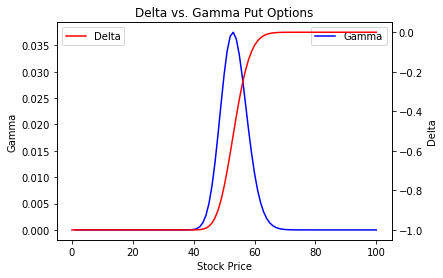

In [30]:
df = pd.DataFrame(list(range(101)), columns = ['Stock Price'])
df['Delta'] = df['Stock Price'].apply(lambda x: black_scholes_put_delta(x, 55, .08, .03, 1))
df['Gamma'] = df['Stock Price'].apply(lambda x: black_scholes_gamma(x, 55, .08, .03, 1))
df = df.set_index('Stock Price')


fig, ax1 = plt.subplots()
#Build a second axis for the delta plotting
ax2 = ax1.twinx()

ax1.plot(df.index, df['Gamma'], 'blue')
ax2.plot(df.index, df['Delta'], 'red')

ax1.set_xlabel('Stock Price')
ax1.set_ylabel('Gamma')
ax2.set_ylabel('Delta')
ax1.legend(['Gamma'])
ax2.legend(['Delta'])

plt.title("Delta vs. Gamma Put Options")

plt.show()

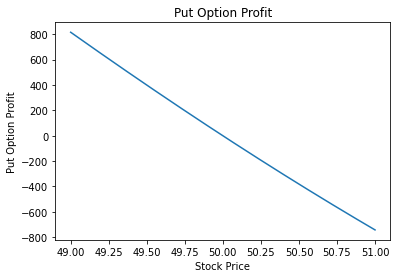

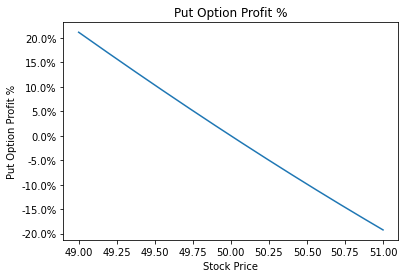

In [31]:
df = pd.DataFrame(np.arange(49,51.01,.01), columns = ['Stock Price'])
df['Put Value'] = df['Stock Price'].apply(lambda x: black_scholes_put(x, 55, .08, .03, 1) * 1000 ) - black_scholes_put(50, 55, .08, .03, 1) * 1000
df = df.set_index('Stock Price')
df['Put Value'].plot(kind='line')
plt.ylabel("Put Option Profit")
plt.xlabel("Stock Price")
plt.title("Put Option Profit")
plt.show()

df['Put % Return'] = df['Put Value'] / (black_scholes_put(50, 55, .08, .03, 1) * 1000)
ax = df['Put % Return'].plot(kind='line')
plt.ylabel("Put Option Profit %")
plt.xlabel("Stock Price")
plt.title("Put Option Profit %")
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))  
plt.show()

In [32]:
n_puts = 1000

delta = black_scholes_put_delta(50, 55, .08, .03, 1)
print("Put Delta")
print(delta)
print()

long_puts_t0 = black_scholes_put(50, 55, .08, .03, 1)*n_puts
print("Value of Puts")
print(long_puts_t0)
print()

n_stock = delta * n_puts * -1
print("Number of shares of stock to hedge")
print(n_stock)
print()

long_stock_t0 = n_stock * 55
print("Value of shares of stock")
print(long_stock_t0)

Put Delta
-0.7812368626673963

Value of Puts
3856.8854846926256

Number of shares of stock to hedge
781.2368626673963

Value of shares of stock
42968.027446706794


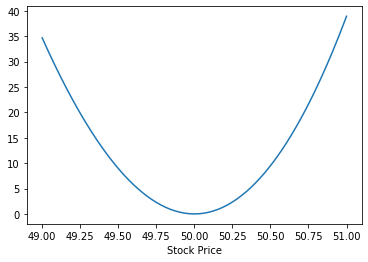

In [33]:
#If there is an immediate change in price either way we are protected
df = pd.DataFrame(np.arange(49,51.01,.01), columns = ['Stock Price'])

#The call profit is the difference between the starting value and current value
df['Put Value'] = df['Stock Price'].apply(lambda x: black_scholes_put(x, 55, .08, .03, 1) * n_puts ) - long_puts_t0

#The stock profit is the difference times the number of stocks (we are short so the profits are flipped)
df['Stock Value'] = (df['Stock Price'] - 50) * n_stock

#The hedged call value is the two profits added together
df['Hedged Put'] = df['Put Value'] + df['Stock Value']

#Plot the profits
df = df.set_index('Stock Price')
df['Hedged Put'].plot(kind='line')
plt.show()

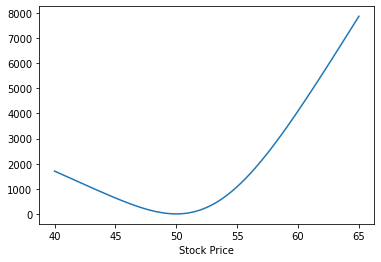

In [34]:
#Expand to a larger range
df = pd.DataFrame(np.arange(40,65.1,.1), columns = ['Stock Price'])

#The call profit is the difference between the starting value and current value
df['Put Value'] = df['Stock Price'].apply(lambda x: black_scholes_put(x, 55, .08, .03, 1) * n_puts ) - long_puts_t0

#The stock profit is the difference times the number of stocks (we are short so the profits are flipped)
df['Stock Value'] = (df['Stock Price'] - 50) * n_stock

#The hedged call value is the two profits added together
df['Hedged Put'] = df['Put Value'] + df['Stock Value']

#Plot the profits
df = df.set_index('Stock Price')
df['Hedged Put'].plot(kind='line')
plt.show()

Net cash:
-46824.91293139942

Interest:
-1426.030900739781


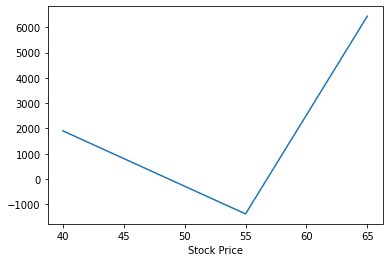

In [35]:
#At expiration the payoff profile is different though...
df = pd.DataFrame(np.arange(40,65.1,.1), columns = ['Stock Price'])

#The call profit is the intrinsic value at expiration
df['Put Value'] = df['Stock Price'].apply(lambda x: max(55-x, 0) * n_puts ) - long_puts_t0

#The stock profit is the difference times the number of stocks (we are short so the profits are flipped)
df['Stock Value'] = (df['Stock Price'] - 50) * n_stock

#The hedged call value is the two profits added together
df['Hedged Put'] = df['Put Value'] + df['Stock Value']

net_cash = -(long_puts_t0 + long_stock_t0)
print("Net cash:")
print(net_cash)
print()

interest = np.exp(.03) * net_cash - net_cash
print("Interest:")
print(interest)

df['Hedged Put'] = df['Hedged Put'] + interest

#Plot the profits
df = df.set_index('Stock Price')
df['Hedged Put'].plot(kind='line')
plt.show()